### IPython Notebook plot 需要的程式碼（必要）

In [1]:
%matplotlib inline

In [2]:
#coding=utf-8
#import
import os

import json
import numpy as np
import time
#Word2Vec,Doc2Vec
import gensim
import logging
#分群
from sklearn.cluster import KMeans
#降維
from sklearn.manifold import TSNE
ts = TSNE(2) #本例子降為2維
#畫圖
import matplotlib.pyplot as plt


In [3]:
#Def
def PrintKeyValue(dic_in):
    for key, value in dic_in.iteritems() :
        print key,'  :  ', value
def jsonDump(dataIn):
    print json.dumps(dataIn,ensure_ascii=False).encode('utf-8')
    
# 創立資料夾
def mkdir(path):
    if  os.path.exists(path)==False:
        os.makedirs(path)
        print '呼叫mkdir，創立資料夾:',path     

In [4]:
#讀取Word2Vec模型
with open('./data/subject.json' , 'r') as f:
    subjectDic = json.load(f)
print '主題詞字典的長度',len(subjectDic)
model = gensim.models.Word2Vec.load('./data/Word2Vec_sz_200_mc_1_sg_by_sentence')

主題詞字典的長度 72838


In [5]:
#讀取KMeans的分群結果
with open('./data/KMeansDicCluster150_V2.json','r') as f:
    KMeansDicCluster150_V2=json.load(f)
print len(KMeansDicCluster150_V2)

150


In [6]:
for ele in KMeansDicCluster150_V2.keys():
    if ele in ['22','23','26']:
        print ele
        jsonDump(KMeansDicCluster150_V2[ele]) 

26
["唐辛子", "糖醋醬", "佐醬", "鹽巴", "和風醬", "香椿醬", "sauce", "配肉", "泰式酸甜醬", "蒜蓉醬", "泰式甜辣醬", "蜂蜜芥末", "哇沙米", "蒜味醬", "有淋上", "抹茶鹽", "辣椒醬", "香醋", "自製辣椒醬", "蔥蒜醬", "金桔汁", "風醋", "酸甜醬", "芝麻鹽", "芝麻醬", "芥末醬油", "加辣", "tabasco", "梅粉", "酸辣醬汁", "魚露", "沙嗲醬", "韓式辣醬", "凱薩醬", "加醬", "梅林", "莎莎醬", "胡麻醬", "蘿蔔泥醬", "桔醬", "淋上", "美乃滋", "味醂", "梅子醬", "美乃茲", "油膏", "千島沙拉醬", "醬汁", "wasabi", "桔汁", "海山醬", "照燒醬汁", "辣味噌醬", "醬會", "沙拉醬", "撒點", "油醋", "醬料", "鹽都", "醬底", "特製", "日式沾醬", "醬油膏", "特調", "泰式沾醬", "水果醋", "水果醬", "優格醬", "辣醬", "梅醬", "沙茶醬", "玉蔥", "醬則", "醬區", "淋醬", "油醋醬汁", "海鹽", "哇沙米醬", "非常開胃", "淋點", "醃料", "大蒜", "橙醋", "橙醬", "腐乳醬", "金桔醬", "小匙", "白醋", "蒜香醬", "佐上", "蒜片", "豆醬", "日式和風", "海苔醬", "沙拉醬汁", "生辣椒", "橙醋醬", "甜辣醬", "小碟", "佐料", "岩鹽", "昆布醬", "橘醋", "五味醬", "山椒", "蕃茄醬", "魚露醬", "蒜泥醬", "一碟", "薄荷醬", "老醋", "椒鹽粉", "黑胡椒醬", "紫蘇", "籽醬", "千島", "烤肉醬", "蘑菇醬", "檸檬醬汁", "咖哩醬", "美奶", "醃漬", "還淋上", "塔塔醬", "一匙", "蔥醬", "蘸上", "調配", "調醬", "胡椒", "芥子", "胡椒鹽", "辣椒油", "照燒醬", "芥末醬", "芥末椒鹽", "辣椒粉", "生薑", "味噌醬汁", "蜂蜜芥茉醬", "dressing", "豬排醬", "檸檬醬", "紅醋", "獨門", "醬

In [7]:
meat=[]
dessert=[]
sauce=[]

for ele in KMeansDicCluster150_V2.keys():
    clusterList=KMeansDicCluster150_V2[ele]
    if ele =='22':
        meat=clusterList
    if ele =='23':
        dessert=clusterList
    if ele =='26':
        sauce=clusterList
print '肉類：'
jsonDump(meat) 
print '----------------------------------------------------------------------------------------------------------------------------------------------------'
print '甜點：'
jsonDump(dessert) 
print '----------------------------------------------------------------------------------------------------------------------------------------------------'
print '醬汁：'
jsonDump(sauce) 

肉類：
["坦都", "雞肉捲", "碳烤牛小排", "雞串", "咖哩娘牛", "烤土雞", "羊腿", "牛頰肉", "啤酒蝦", "酥炸雞柳", "香雞腿", "鮑菇", "雞肉燒", "羊肩排", "炭烤豬肋排", "海鮮雙拼", "冰島鱈魚", "炭烤雞腿", "醃肉", "腓力", "菲力豬", "尼斯沙拉", "紅酒菲力", "烤全雞", "味噌雞腿肉", "燒味", "佐鹽", "海陸雙拼", "煙燻豬腳", "咖哩燉飯", "咖哩南瓜", "烤羊", "燒牛", "鮭魚排", "霜降松阪豬", "元香", "薄鹽鯖魚", "焗烤生蠔", "半雞", "燉羊膝", "火焰", "脆皮豬腳", "雞腿捲", "油封", "香蒜瓦片牛肉", "日式照燒", "香雞", "德州", "野鴨", "德國脆皮豬腳", "小里", "牛頰", "羊里肌", "照燒雞肉", "nt420", "牛髓", "豬肋排", "櫻桃鴨胸", "燒烤牛肉", "香草雞", "桂丁", "雞翼", "烤火雞", "鴨腿", "燒汁", "燒烤豬肋排", "鴨胸", "牛雞", "啤酒豬腳", "香煎雞排", "美國牛五花", "烤豬肋排", "全雞", "烤茄子", "雞肉", "雞胸", "香烤德國豬腳", "鮮嫩雞腿肉", "香煎鮭魚", "香酥雞腿", "醬漬", "陶板", "卵小卷", "黃金豬排", "香煎雞腿", "牛肉沙拉", "煎牛小排", "法式羊排", "春雞", "雞頸", "焗烤龍蝦", "地雞", "北海道鮮干貝", "鮮茄", "香煎鱈魚", "牛小排義大利麵", "泡菜豬五花", "煙燻雞", "蒜香雞腿", "野味", "烤鮮魚", "石燒", "骨腿", "炭烤", "香煎鴨肝", "火雞", "乳鴿", "烤中捲", "豪野", "燉羊肉", "醬牛肉", "香蒜雞腿", "香烤", "松坂", "香草雞腿", "客家鹹豬肉", "達拉斯", "碳烤雞腿排", "沙嗲雞肉串", "牛肝菌燉飯", "牛肉卷", "秘醬", "碳烤牛肉", "棒腿", "脆皮德國豬腳", "石燒豚", "霜降豬排", "鐵板牛排", "蒜味雞", "腩排", "燒香", "燻烤", "強肴", "脆皮雞腿排", "煎魚", "小春", "燒醬", "蜜汁",

In [8]:
#取得分群內所有詞性的List長度
def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,200)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values
print len(meat)
print len(dessert)
print len(sauce)
meat_vecs = getWordVecs(meat)
dessert_vecs = getWordVecs(dessert)
sauce_vecs = getWordVecs(sauce)

293
142
193


### 視覺化方法一：

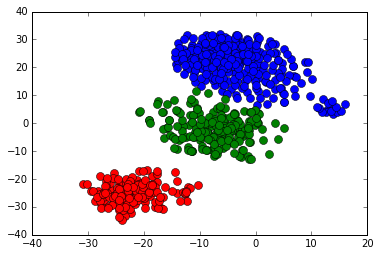

In [9]:
ts = TSNE(2)
reduced_vecs = ts.fit_transform(np.concatenate((meat_vecs, dessert_vecs, sauce_vecs)))

#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(meat_vecs):
        #food words colored blue
        color = 'b'
    elif i >= len(meat_vecs) and i < (len(meat_vecs) + len(dessert_vecs)):
        #sports words colored red
        color = 'r'
    else:
        #weather words colored green
        color = 'g'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color,markersize=8)
plt.savefig('images/word2Vec_tsne-generated.png')


### 視覺化方法二：

# Visualizing handwritten digits
### Let's first import a few libraries.

In [10]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

In [11]:
# We first reorder the data points according to the handwritten numbers.
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])

#寫DEF時要處理
# ts = TSNE(2)
# reduced_vecs = ts.fit_transform(np.concatenate((meat_vecs, dessert_vecs, sauce_vecs)))


#293,142,193
a=np.full((1, 293), 0, dtype=int)
b=np.full((1, 142), 1, dtype=int)
c=np.full((1, 193), 2, dtype=int)


y=np.append(a, b)
y=np.append(y, c)
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [12]:
def scatter(x, colors,num):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### Here is the result.

[[ 11.71740101   8.92824947]
 [ 13.79265409   6.43125879]
 [ -0.55976492  -2.39186175]
 ..., 
 [ 31.87619862  -8.80128276]
 [ 19.39979122 -13.12813221]
 [ 14.72817042 -17.90581523]]


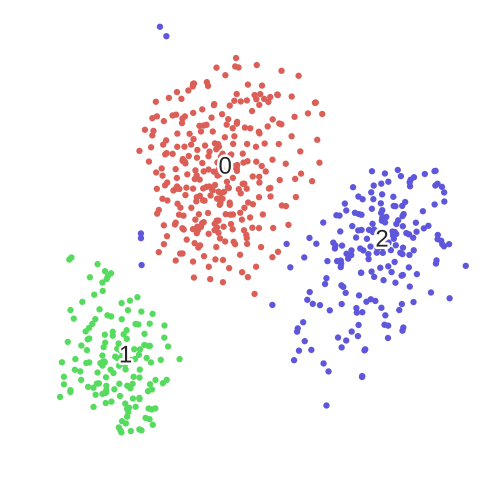

In [34]:
print reduced_vecs
scatter(reduced_vecs, y,3)
plt.savefig('images/word2Vec_tsne-generated.png', dpi=120)

# Visualizing handwritten digits
### Let's first import a few libraries.

In [16]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
    

In [13]:
#讀取KMeans的分群結果
with open('./data/KMeansDicCluster150_V2.json','r') as f:
    KMeansDicCluster150_V2=json.load(f)
print len(KMeansDicCluster150_V2)

150


### run畫圖的def前，要先run以下兩個def

In [14]:
#用來回傳詞的Vec 
#words為某群的所有詞組成的List
#VecSize為訓練Wored2Vec或Doc2Vec時設定的向量長度
def getWordVecs(words,VecSize):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,VecSize)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    #print len(vecs)
    #TSNE expects float type values
    return np.array(vecs, dtype='float') 

In [15]:
# Plot的前處理
# x為降為後的詞向量
# num為選取的全數量
# fSize為圖的尺寸
def scatter(x, colors,num,fSize):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num))

    # We create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [16]:
# dataIn為分群結果組成的Dic,key為群,value為詞組成的List
# selectList要拿來plot的群
# Word2VecSize為Doc2Vec或Word2Vec訓練時，詞設定的向量
# figureSize為polt的尺寸
# plotSavePath圖片存的路徑
# dpiSize 圖片的dpi，愈大跑愈久

def DoTSNE_Plot2D(dataIn,selectList,Word2VecSize,figureSize,plotSavePath,dpiSize):
    STime=time.time()
    print '讀取的資料有',len(dataIn),'群'
    print '本次從中選取',len(selectList),'群，來降維→視覺化'
    bigList = []
    for ele in dataIn:
        smallList=[]
        smallList=dataIn[ele]
        if ele in selectList:
            bigList.append(smallList)
            

    print '向量降維與圖片生成中，請稍候！'
    y=np.array([],dtype=int)
    BeforeVec=[]
    for i in range(len(bigList)):
        tempNp=np.array([])
        #listLen = len(bigList[i])
        tempNp=np.full((1,len(bigList[i])),i,dtype=int)
        y=np.append(y, tempNp)
        BeforeVec.append(getWordVecs(bigList[i],Word2VecSize))
    AfterVec=ts.fit_transform(np.concatenate((BeforeVec)))
    #print AfterVec
        
    #y向量的值對應群list的辭彙，因此同一群的詞對應的y值相同'
    #print 'y=\n',y
    
    scatter(AfterVec, y,len(selectList),figureSize)
    plt.savefig(plotSavePath, dpi=dpiSize)
    ETime=time.time()

    print '完成！ 共計花費%.0f秒。' % (ETime - STime) 


讀取的資料有 150 群
本次從中選取 3 群，來降維→視覺化
向量降維與圖片生成中，請稍候！
完成！ 共計花費4秒。


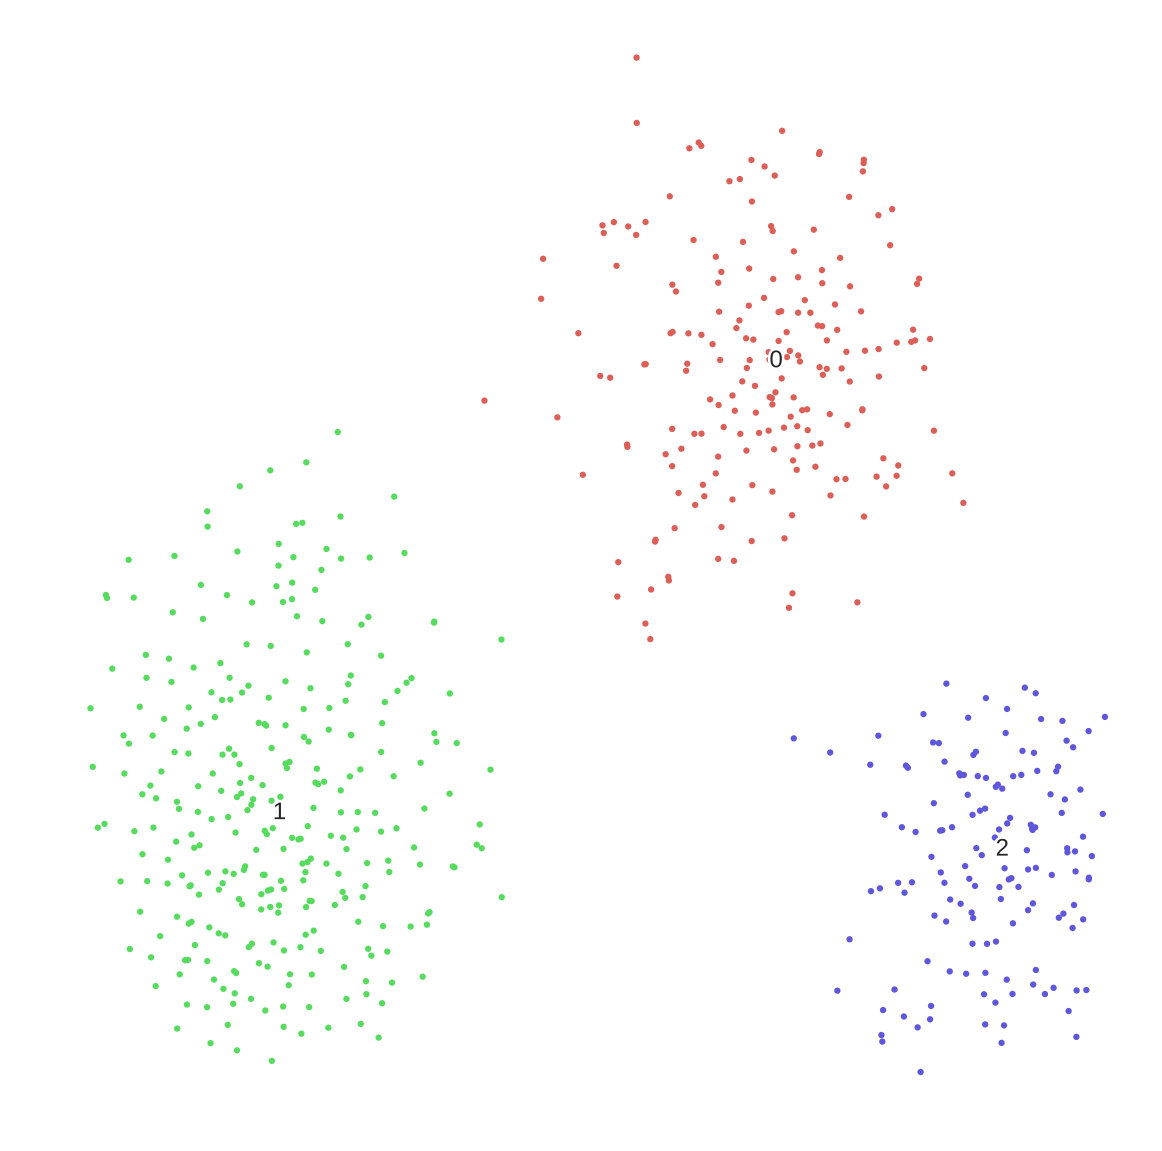

In [17]:
DoTSNE_Plot2D(KMeansDicCluster150_V2,['22','23','26'],200,10,'./images/word2Vec_tsne-generated10_150.png',100)

In [106]:
list1=['%d'%i for i in range(150)]
print list1

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']


讀取的資料有 150 群
本次從中選取 10 群，來降維→視覺化
向量降維與圖片生成中，請稍候！
完成！ 共計花費182秒。


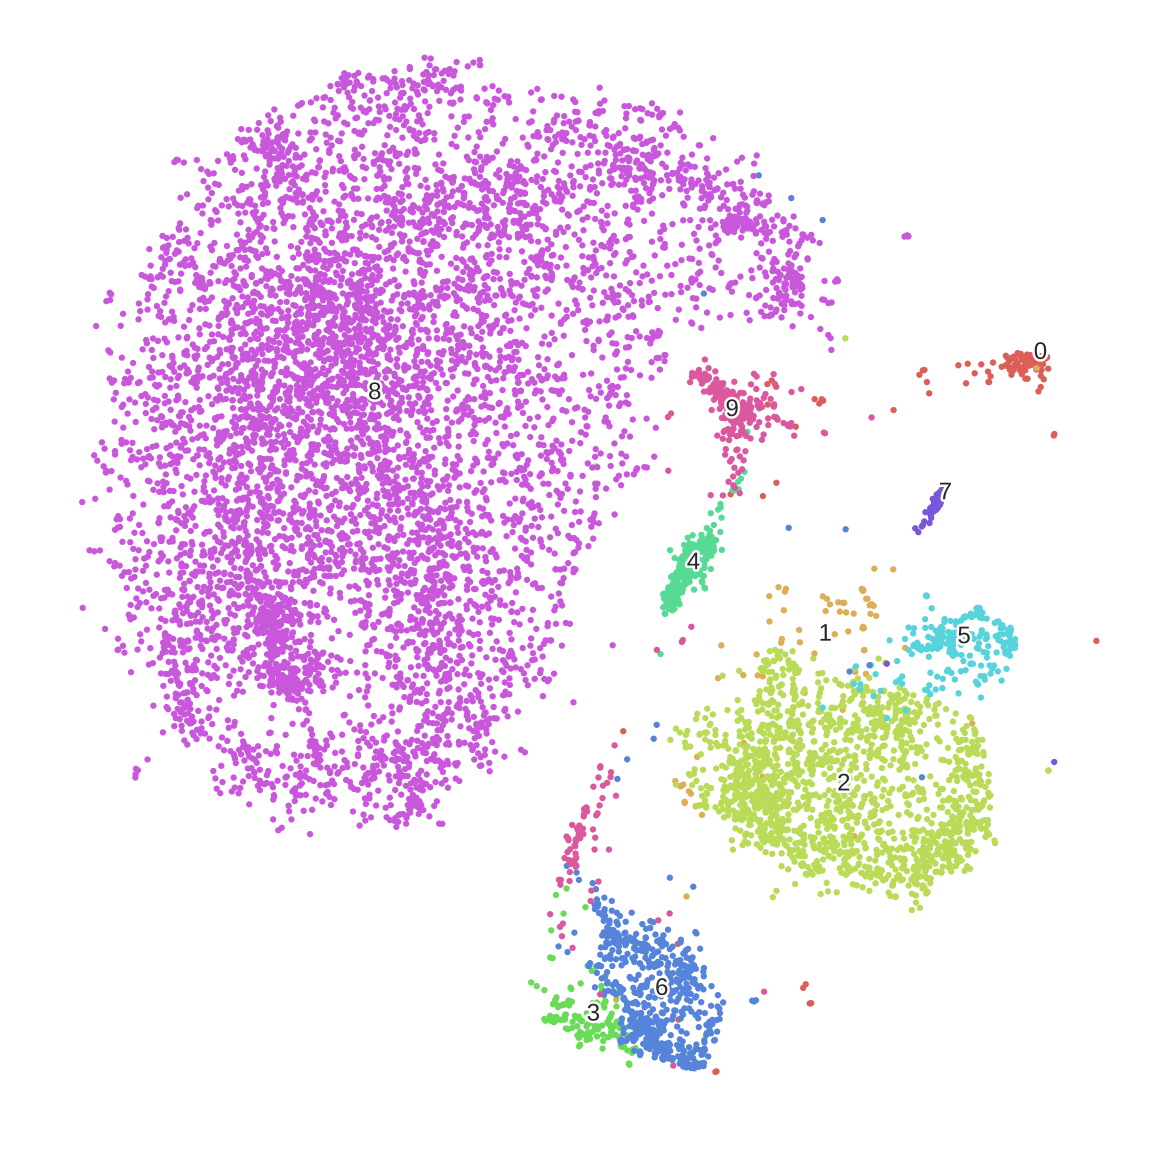

In [23]:
Listchoose=['%d'%i for i in range(10)]
DoTSNE_Plot2D(KMeansDicCluster150_V2,Listchoose,200,10,'./images/word2Vec_tsne-generated_c10_v2.png',30)

讀取的資料有 150 群
本次從中選取 3 群，來降維→視覺化
向量降維與圖片生成中，請稍候！
完成！ 共計花費4秒。


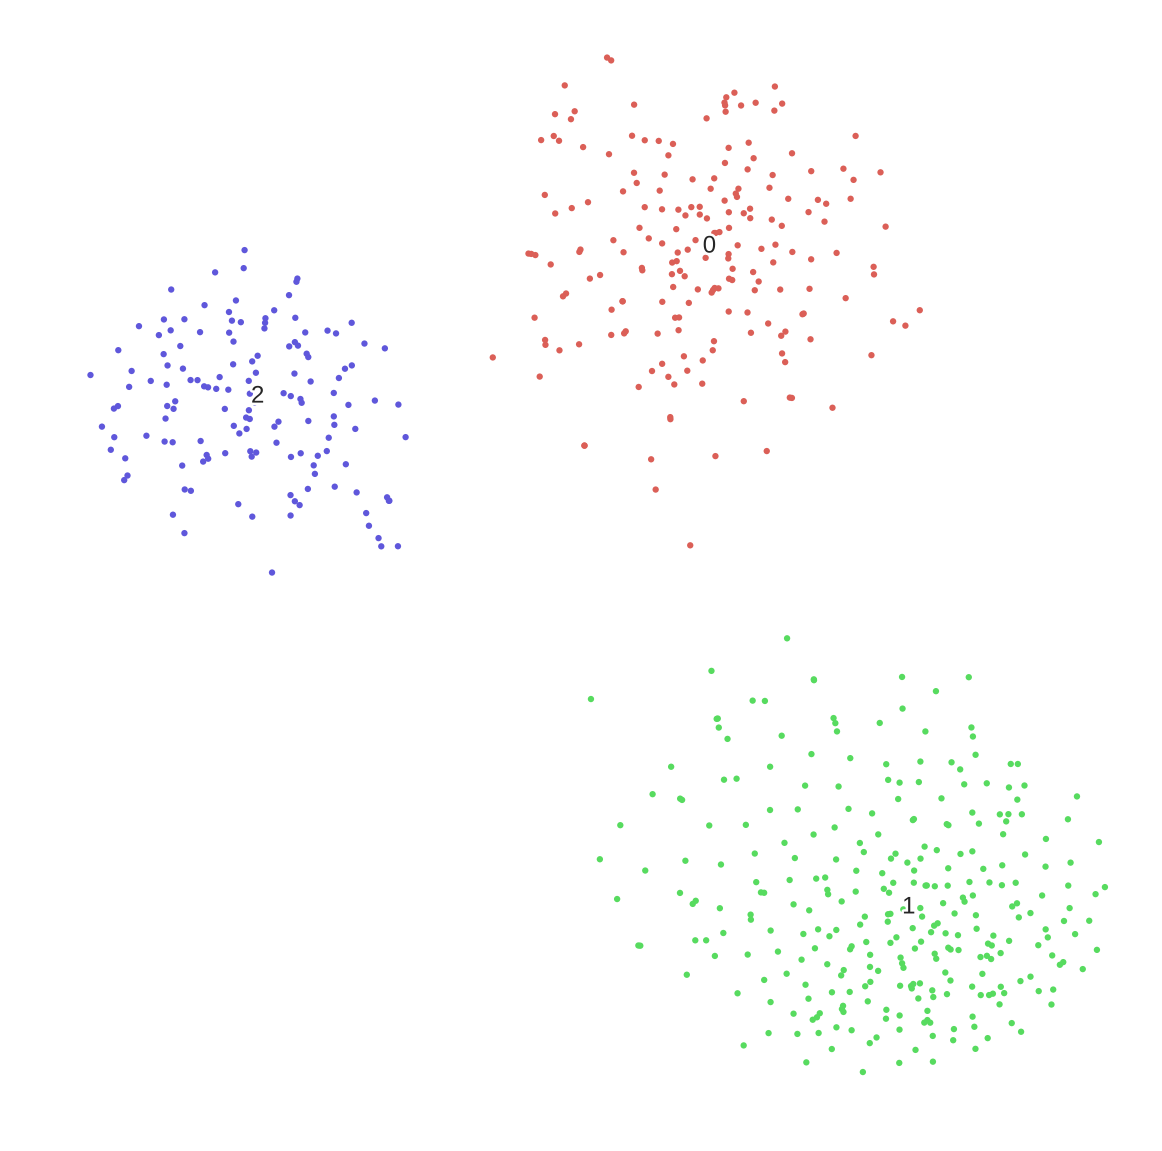

In [21]:
# dataIn為分群結果組成的Dic,key為群,value為詞組成的List
# selectList要拿來plot的群
# Word2VecSize為Doc2Vec或Word2Vec訓練時，詞設定的向量
# figureSize為polt的尺寸
# plotSavePath圖片存的路徑
# dpiSize 圖片的dpi，愈大跑愈久

DoTSNE_Plot2D(KMeansDicCluster150_V2,['22','23','26'],200,10,'./images/word2Vec_tsne-generated_plotSize10_dpi100.png',100)

In [ ]:
### Similarity matrix


In [20]:
X=np.concatenate((BeforeVec))


def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P


# Pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# Similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# Similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

plt.figure(figsize=(12, 4))
pal = sns.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 3})

plt.subplot(133)
plt.imshow(P_binary_s[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 3})
plt.savefig('images/similarity-generated.png', dpi=120)

NameError: name 'BeforeVec' is not defined

### Algorithm

In [27]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error < best_error:
            best_error = error
            best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        if min_grad_norm >= grad_norm:
            break
        if min_error_diff >= error_diff:
            break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [31]:
### Let's run the algorithm again, but this time saving all intermediate positions.

In [32]:
X_proj = TSNE(random_state=RS).fit_transform(X)
X_iter = np.dstack(position.reshape(-1, 2)
                   for position in positions)
f, ax, sc, txts = scatter(X_iter[..., -1], y)

def make_frame_mpl(t):
    i = int(t*40)
    x = X_iter[..., i]
    sc.set_offsets(x)
    for j, txt in zip(range(10), txts):
        xtext, ytext = np.median(x[y == j, :], axis=0)
        txt.set_x(xtext)
        txt.set_y(ytext)
    return mplfig_to_npimage(f)

animation = mpy.VideoClip(make_frame_mpl,
                          duration=X_iter.shape[2]/40.)
animation.write_gif("images/animation.gif", fps=20)

NameError: name 'AfterVec' is not defined

In [36]:
# dataIn為分群結果組成的Dic,key為群,value為詞組成的List
# selectList要拿來plot的群
# Word2VecSize為Doc2Vec或Word2Vec訓練時，詞設定的向量
# figureSize為polt的尺寸
# plotSavePath圖片存的路徑
# dpiSize 圖片的dpi，愈大跑愈久

def DoTSNE_Plot2D2(dataIn,selectList,Word2VecSize,figureSize,plotSavePath,dpiSize):
    STime=time.time()
    print '讀取的資料有',len(dataIn),'群'
    print '本次從中選取',len(selectList),'群，來降維→視覺化'
    bigList = []
    for ele in dataIn:
        smallList=[]
        smallList=dataIn[ele]
        if ele in selectList:
            bigList.append(smallList)
            

    print '向量降維與圖片生成中，請稍候！'
    y=np.array([],dtype=int)
    BeforeVec=[]
    for i in range(len(bigList)):
        tempNp=np.array([])
        #listLen = len(bigList[i])
        tempNp=np.full((1,len(bigList[i])),i,dtype=int)
        y=np.append(y, tempNp)
        BeforeVec.append(getWordVecs(bigList[i],Word2VecSize))
    AfterVec=ts.fit_transform(np.concatenate((BeforeVec)))
    #print AfterVec
        
    #y向量的值對應群list的辭彙，因此同一群的詞對應的y值相同'
    #print 'y=\n',y
    
    scatter(AfterVec, y,len(selectList),figureSize)
    plt.savefig(plotSavePath, dpi=dpiSize)
    ETime=time.time()

    print '完成！ 共計花費%.0f秒。' % (ETime - STime) 
    ###

    
#     # This list will contain the positions of the map points at every iteration.
#     positions = []
#     def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
#                           momentum=0.5, learning_rate=1000.0, min_gain=0.01,
#                           min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
#                           args=[]):
#         # The documentation of this function can be found in scikit-learn's code.
#         p = p0.copy().ravel()
#         update = np.zeros_like(p)
#         gains = np.ones_like(p)
#         error = np.finfo(np.float).max
#         best_error = np.finfo(np.float).max
#         best_iter = 0

#         for i in range(it, n_iter):
#             # We save the current position.
#             positions.append(p.copy())

#             new_error, grad = objective(p, *args)
#             error_diff = np.abs(new_error - error)
#             error = new_error
#             grad_norm = linalg.norm(grad)

#             if error < best_error:
#                 best_error = error
#                 best_iter = i
#             elif i - best_iter > n_iter_without_progress:
#                 break
#             if min_grad_norm >= grad_norm:
#                 break
#             if min_error_diff >= error_diff:
#                 break

#             inc = update * grad >= 0.0
#             dec = np.invert(inc)
#             gains[inc] += 0.05
#             gains[dec] *= 0.95
#             np.clip(gains, min_gain, np.inf)
#             grad *= gains
#             update = momentum * update - learning_rate * grad
#             p += update

#         return p, error, i
#     sklearn.manifold.t_sne._gradient_descent = _gradient_descent
#     X_proj = TSNE(random_state=RS).fit_transform(X)
#     X_iter = np.dstack(position.reshape(-1, 2)    for position in positions)
#     f, ax, sc, txts = scatter(X_iter[..., -1], y)

#     def make_frame_mpl(t):
#         i = int(t*40)
#         x = X_iter[..., i]
#         sc.set_offsets(x)
#         for j, txt in zip(range(3), txts):
#             xtext, ytext = np.median(x[y == j, :], axis=0)
#             txt.set_x(xtext)
#             txt.set_y(ytext)
#         return mplfig_to_npimage(f)

#     animation = mpy.VideoClip(make_frame_mpl,
#                               duration=X_iter.shape[2]/40.)
#     animation.write_gif("images/animation.gif", fps=20)

In [37]:
# dataIn為分群結果組成的Dic,key為群,value為詞組成的List
# selectList要拿來plot的群
# Word2VecSize為Doc2Vec或Word2Vec訓練時，詞設定的向量
# figureSize為polt的尺寸
# plotSavePath圖片存的路徑
# dpiSize 圖片的dpi，愈大跑愈久

DoTSNE_Plot2D2(KMeansDicCluster150_V2,['22','23','26'],200,10,'./images/word2Vec_tsne-generated_plotSize10_dpi100.png',100)

讀取的資料有 150 群
本次從中選取 3 群，來降維→視覺化
向量降維與圖片生成中，請稍候！


TypeError: _gradient_descent() got an unexpected keyword argument 'n_iter_check'